In [40]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

import corner

sys.path.append('../src')
import const as c

%matplotlib inline

In [20]:
fontProperties = {'family':'serif', 'serif':['Times New Roman'], 'weight':'normal', 'size':12}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal', \
                                         weight='normal', stretch='normal', size=10)
plt.rc('font', **fontProperties)


In [16]:
dtype = [('P_posterior','f8'), ('theta','f8'), ('distance','f8'), ('proj_sep','f8'),
         ('source_id_1','<i8'), ('TYC_id_1','S11'), ('hip_id_1','<i8'),
         ('ra_1','f8'), ('dec_1','f8'),
         ('mu_ra_1','f8'), ('mu_dec_1','f8'), ('mu_ra_err_1','f8'), ('mu_dec_err_1','f8'),
         ('plx_1','f8'), ('plx_err_1','f8'),
         ('gaia_g_flux_1','<f8'), ('gaia_g_flux_err_1','<f8'), ('gaia_g_mag_1','<f8'),
         ('TMASS_id_1','<i8'), ('TMASS_angle_dist_1','<f8'),
         ('TMASS_n_neighbours_1','<i8'), ('TMASS_n_mates_1','<i8'), ('TMASS_ph_qual_1','S11'),
         ('TMASS_ra_1','<f8'), ('TMASS_dec_1','<f8'),
         ('TMASS_j_mag_1','<f8'), ('TMASS_j_mag_err_1','<f8'),
         ('TMASS_h_mag_1','<f8'), ('TMASS_h_mag_err_1','<f8'),
         ('TMASS_ks_mag_1','<f8'), ('TMASS_ks_mag_err_1','<f8'),
         ('TYC_Vt_1','<f8'), ('TYC_Vt_err_1','<f8'),
         ('TYC_Bt_1','<f8'), ('TYC_Bt_err_1','<f8'),
         ('gaia_delta_Q_1','<f8'), ('gaia_noise_1','<f8'),
         #
         ('source_id_2','<i8'), ('TYC_id_2','S11'), ('hip_id_2','<i8'),
         ('ra_2','f8'), ('dec_2','f8'),
         ('mu_ra_2','f8'), ('mu_dec_2','f8'), ('mu_ra_err_2','f8'), ('mu_dec_err_2','f8'),
         ('plx_2','f8'), ('plx_err_2','f8'),
         ('gaia_g_flux_2','<f8'), ('gaia_g_flux_err_2','<f8'), ('gaia_g_mag_2','<f8'),
         ('TMASS_id_2','<i8'), ('TMASS_angle_dist_2','<f8'),
         ('TMASS_n_neighbours_2','<i8'), ('TMASS_n_mates_2','<i8'), ('TMASS_ph_qual_2','S11'),
         ('TMASS_ra_2','<f8'), ('TMASS_dec_2','<f8'),
         ('TMASS_j_mag_2','<f8'), ('TMASS_j_mag_err_2','<f8'),
         ('TMASS_h_mag_2','<f8'), ('TMASS_h_mag_err_2','<f8'),
         ('TMASS_ks_mag_2','<f8'), ('TMASS_ks_mag_err_2','<f8'),
         ('TYC_Vt_2','<f8'), ('TYC_Vt_err_2','<f8'),
         ('TYC_Bt_2','<f8'), ('TYC_Bt_err_2','<f8'),
         ('gaia_delta_Q_2','<f8'), ('gaia_noise_2','<f8')
        ]

folder = '../data/TGAS/'

TGAS_power_law = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_a_power_law_cleaned.txt', dtype=dtype, names=True)
TGAS_log_flat = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_cleaned.txt', dtype=dtype, names=True)
TGAS_power_law_good = TGAS_power_law[TGAS_power_law['P_posterior'] > 0.99]
TGAS_log_flat_good = TGAS_log_flat[TGAS_log_flat['P_posterior'] > 0.99]


TGAS_power_law_false = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_a_power_law_false_cleaned.txt', dtype=dtype, names=True)
TGAS_log_flat_false = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_a_log_flat_false_cleaned.txt', dtype=dtype, names=True)
TGAS_power_law_false_good = TGAS_power_law_false[TGAS_power_law_false['P_posterior'] > 0.99]
TGAS_log_flat_false_good = TGAS_log_flat_false[TGAS_log_flat_false['P_posterior'] > 0.99]

In [33]:
#### LOG FLAT ####
# Calculate distance from average parallaxes, weighted by uncertainties
dist_log_flat = np.zeros(len(TGAS_log_flat))
for i in np.arange(len(TGAS_log_flat)):
    vals = [TGAS_log_flat['plx_1'][i],TGAS_log_flat['plx_2'][i]]
    weights = [1.0/TGAS_log_flat['plx_err_1'][i],1.0/TGAS_log_flat['plx_err_2'][i]]
    dist_log_flat[i] = 1.0e3/np.average(vals, weights=weights)
    
# Calculate the physical separation in AU
s_log_flat = (TGAS_log_flat['theta']*np.pi/180.0/3600.0) * dist_log_flat * (c.pc_to_cm/c.AU_to_cm)

# Calculate the primary's proper motion
mu_1_log_flat = np.sqrt(TGAS_log_flat['mu_ra_1']**2 + TGAS_log_flat['mu_dec_1']**2)
delta_mu_log_flat = np.sqrt((TGAS_log_flat['mu_ra_1']-TGAS_log_flat['mu_ra_2'])**2 + (TGAS_log_flat['mu_dec_1']-TGAS_log_flat['mu_dec_2'])**2)

# values for "good" pairs only
dist_log_flat_good = dist_log_flat[TGAS_log_flat['P_posterior'] > 0.99]
s_log_flat_good = s_log_flat[TGAS_log_flat['P_posterior'] > 0.99]



#### POWER LAW ####
# Calculate distance from average parallaxes, weighted by uncertainties
dist_power_law = np.zeros(len(TGAS_power_law))
for i in np.arange(len(TGAS_power_law)):
    vals = [TGAS_power_law['plx_1'][i],TGAS_power_law['plx_2'][i]]
    weights = [1.0/TGAS_power_law['plx_err_1'][i],1.0/TGAS_power_law['plx_err_2'][i]]
    dist_power_law[i] = 1.0e3/np.average(vals, weights=weights)
    
# Calculate the physical separation in AU
s_power_law = (TGAS_power_law['theta']*np.pi/180.0/3600.0) * dist_power_law * (c.pc_to_cm/c.AU_to_cm)

# Calculate the primary's proper motion
mu_1_power_law = np.sqrt(TGAS_power_law['mu_ra_1']**2 + TGAS_power_law['mu_dec_1']**2)
delta_mu_power_law = np.sqrt((TGAS_power_law['mu_ra_1']-TGAS_power_law['mu_ra_2'])**2 + (TGAS_power_law['mu_dec_1']-TGAS_power_law['mu_dec_2'])**2)

# values for "good" pairs only
dist_power_law_good = dist_power_law[TGAS_power_law['P_posterior'] > 0.99]
s_power_law_good = s_power_law[TGAS_power_law['P_posterior'] > 0.99]




#### LOG FLAT FALSE ####
# Calculate distance from average parallaxes, weighted by uncertainties
dist_log_flat_false = np.zeros(len(TGAS_log_flat_false))
for i in np.arange(len(TGAS_log_flat_false)):
    vals = [TGAS_log_flat_false['plx_1'][i],TGAS_log_flat_false['plx_2'][i]]
    weights = [1.0/TGAS_log_flat_false['plx_err_1'][i],1.0/TGAS_log_flat_false['plx_err_2'][i]]
    dist_log_flat_false[i] = 1.0e3/np.average(vals, weights=weights)
    
# Calculate the physical separation in AU
s_log_flat_false = (TGAS_log_flat_false['theta']*np.pi/180.0/3600.0) * dist_log_flat_false * (c.pc_to_cm/c.AU_to_cm)

# Calculate the primary's proper motion
mu_1_log_flat_false = np.sqrt(TGAS_log_flat_false['mu_ra_1']**2 + TGAS_log_flat_false['mu_dec_1']**2)
delta_mu_log_flat_false = np.sqrt((TGAS_log_flat_false['mu_ra_1']-TGAS_log_flat_false['mu_ra_2'])**2 + (TGAS_log_flat_false['mu_dec_1']-TGAS_log_flat_false['mu_dec_2'])**2)

# values for "good" pairs only
dist_log_flat_false_good = dist_log_flat_false[TGAS_log_flat_false['P_posterior'] > 0.99]
s_log_flat_false_good = s_log_flat_false[TGAS_log_flat_false['P_posterior'] > 0.99]


#### POWER LAW FALSE ####
# Calculate distance from average parallaxes, weighted by uncertainties
dist_power_law_false = np.zeros(len(TGAS_power_law_false))
for i in np.arange(len(TGAS_power_law_false)):
    vals = [TGAS_power_law_false['plx_1'][i],TGAS_power_law_false['plx_2'][i]]
    weights = [1.0/TGAS_power_law_false['plx_err_1'][i],1.0/TGAS_power_law_false['plx_err_2'][i]]
    dist_power_law_false[i] = 1.0e3/np.average(vals, weights=weights)
    
# Calculate the physical separation in AU
s_power_law_false = (TGAS_power_law_false['theta']*np.pi/180.0/3600.0) * dist_power_law_false * (c.pc_to_cm/c.AU_to_cm)

# Calculate the primary's proper motion
mu_1_power_law_false = np.sqrt(TGAS_power_law_false['mu_ra_1']**2 + TGAS_power_law_false['mu_dec_1']**2)
delta_mu_power_law_false = np.sqrt((TGAS_power_law_false['mu_ra_1']-TGAS_power_law_false['mu_ra_2'])**2 + (TGAS_power_law_false['mu_dec_1']-TGAS_power_law_false['mu_dec_2'])**2)

# values for "good" pairs only
dist_power_law_false_good = dist_power_law_false[TGAS_power_law_false['P_posterior'] > 0.99]
s_power_law_false_good = s_power_law_false[TGAS_power_law_false['P_posterior'] > 0.99]


In [45]:
corner.hist2d?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in log10


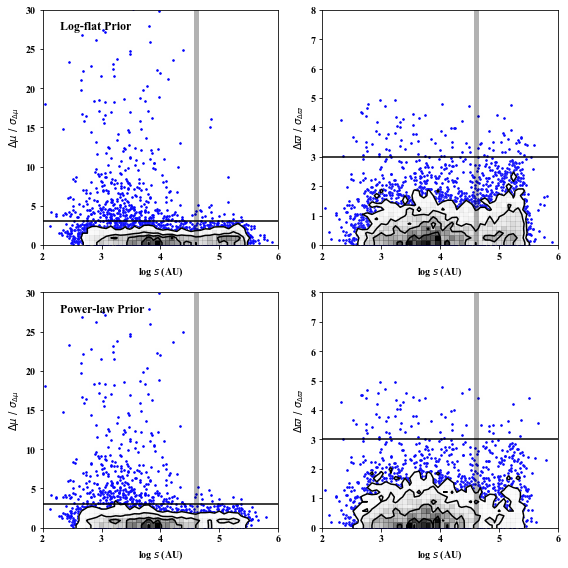

In [74]:
def calc_mu_delta(mu_ra1, mu_dec1, mu_ra2, mu_dec2):
    return np.sqrt((mu_ra1-mu_ra2)**2 + (mu_dec1-mu_dec2)**2)


def plot_dmu(t, s, ax):

    mu_ra1, mu_dec1 = t['mu_ra_1'], t['mu_dec_1']
    mu_ra2, mu_dec2 = t['mu_ra_2'], t['mu_dec_2']
    mu_ra_err1, mu_dec_err1 = t['mu_ra_err_1'], t['mu_dec_err_1']
    mu_ra_err2, mu_dec_err2 = t['mu_ra_err_2'], t['mu_dec_err_2']


    mu_delta = calc_mu_delta(mu_ra1, mu_dec1, mu_ra2, mu_dec2)
    mu_delta_err = np.sqrt(mu_ra_err1**2 + mu_dec_err1**2 + mu_ra_err2**2 + mu_dec_err2**2)

    
    range=([2, 6], [0, 30])
    
    ax.scatter(np.log10(s), mu_delta/mu_delta_err, marker='.', alpha=1.0, color='b', s=10)
    corner.hist2d(np.log10(s), mu_delta/mu_delta_err, bins=50, range=range, ax=ax, plot_datapoints=False)



def plot_plx(t, s, ax):
    
    plx_delta = np.abs(t['plx_1'] - t['plx_2'])
    plx_delta_err = np.sqrt(t['plx_err_1']**2 + t['plx_err_2']**2)

    range=([2, 6], [0, 8])
    ax.scatter(np.log10(s), plx_delta/plx_delta_err, marker='.', alpha=1.0, color='b', s=10)
    corner.hist2d(np.log10(s), plx_delta/plx_delta_err, bins=50, range=range, ax=ax)
    
    
    
fig, ax = plt.subplots(2,2, figsize=(8,8))
    

for i in range(2):
    for j in range(2):
        ax[i,j].axvline(np.log10(4.0e4), color='k', alpha=0.3, linewidth=5)
        
    
    
plot_dmu(TGAS_log_flat_good, s_log_flat_good, ax[0,0])
plot_plx(TGAS_log_flat_good, s_log_flat_good, ax[0,1])
plot_dmu(TGAS_power_law_good, s_power_law_good, ax[1,0])
plot_plx(TGAS_power_law_good, s_power_law_good, ax[1,1])
    
    
for i in range(2):
    ax[i,0].set_xlim(2, 6)
    ax[i,0].set_ylim(0, 30)

    ax[i,0].axhline(3.0, color='k')

    ax[i,0].set_xlabel(r"log $s$ (AU)")
    ax[i,0].set_ylabel(r"$\Delta \mu\ /\ \sigma_{\Delta \mu}$")

for i in range(2):
    ax[i,1].set_xlim(2, 6)
    ax[i,1].set_ylim(0, 8)

    ax[i,1].axhline(3.0, color='k')

    ax[i,1].set_xlabel(r"log $s$ (AU)")
    ax[i,1].set_ylabel(r"$\Delta \varpi\ /\ \sigma_{\Delta \varpi}$")

    
ax[0,0].text(2.3, 27.5, "Log-flat Prior", size=12)
ax[1,0].text(2.3, 27.5, "Power-law Prior", size=12)
    
plt.tight_layout()

# plt.show()
plt.savefig("../figures/TGAS_mu_plx_compare.pdf")